## Beam problem: Eigenvalue method

### Dependencies

In [8]:
from meshes import *
from Eigenvalues import *
from get_S import *
from get_M import *

import matplotlib.pyplot as plt
import numpy as np


"""
For the widgets to show up, do the following in the anaconda prompt:

conda install -c conda-forge ipywidgets
jupyter labextension install @jupyter-widgets/jupyterlab-manager
"""
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

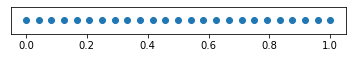

In [9]:
# Spatial resolution of mesh
N = 25

# Right limit of mesh
L = 1

# Generate 1D mesh
[nodes, elems, faces] = get_mesh_1D(N, [0,L], True);
elems = np.array(elems)   

In [10]:
E=1
I=1
mu_const = 1    
two_sided_support = True

In [27]:
# Get matrices
M_ext = get_extended_M(nodes, elems, mu_const)
S_ext = get_extended_S(nodes, elems, E, I, two_sided_support)
M = get_M_global(nodes, elems, mu_const)

# Create time array
T = 10   # end time
dt = 0.1 # time step size
times = np.arange(0, T, dt)

# Initial values
w_init = np.ones(np.shape(M)[0])
wp_init = np.ones(np.shape(M)[0])

# Create solution object
sol_eigen = Eigenvalues(w0=w_init, wp0=wp_init, M=M, Me=M_ext, Se=S_ext)

# Get transient solutions (w[:, k] should be solution at time step k etc.) 
w, mu = sol_eigen.solver(times)

print(w[:,0])


[ 0.00000000e+00  0.00000000e+00  5.69747908e+01  1.07685108e+02
 -3.92624710e-01  2.68584566e+01 -3.72655938e-01  1.22823930e+01
  1.50516388e-01 -6.82408191e+00  1.66241518e-01  4.26428660e+00
  2.67429387e-01 -2.80055164e+00  1.48884325e-01  2.20152977e+00
  1.65484383e-01 -2.28179189e+00 -1.95740683e-02  1.93045333e+00
 -1.05240003e-02  1.14842729e+00 -2.66961643e-01 -7.91622114e-01
 -5.59147082e-01 -1.94514833e-01  7.29581029e-01 -7.13085480e-01
  1.47802440e-01  5.40693283e-01  1.01845528e-02 -1.51952856e-01
 -1.11421970e-02 -8.97537139e-02  1.07329689e-01  3.72950483e-01
 -5.20800221e-02  4.11144354e-01  1.35937915e-01 -3.26975926e-01
 -9.39362417e-02 -2.16477687e-01  8.86571558e-02 -1.09578115e-01
  4.55182526e-02  1.64313267e-01 -1.43685251e-02  1.84883297e-01
 -1.07943872e-02 -1.81790456e-01]
